The tutorial of SGM class

In [1]:
import sys
sys.path.append("../mypkg")

In [4]:
from constants import DATA_ROOT, FIG_ROOT
from sgm.sgm import SGM
from utils.misc import load_pkl

In [5]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from easydict import EasyDict as edict
from tqdm import tqdm

%matplotlib inline
plt.style.use(FIG_ROOT/"base.mplstyle")

In [6]:
%load_ext autoreload
%autoreload 2
# 0,1, 2, 3, be careful about the space

# Load data and params

In [13]:
meg_example = load_pkl(DATA_ROOT/"example_meg.pkl");
sc_mat = meg_example.sc_mat
dist_mat = meg_example.dist_mat;

Load file /data/rajlab1/user_data/jin/MyResearch/SBI-SGM_clean/notebooks/../mypkg/../data/example_meg.pkl


In [8]:
# the input params
paramv = np.array([0.5, 0.1, 0.1, 0.01, 0.01, 0.10, 10])
names = ["alpha", "gei", "gii", "Taue", "TauG", "Taui", "Speed"]
freqs = np.linspace(2, 45, 50)

params = edict()
for name, v in zip(names, paramv):
    params[name]=v
params

{'alpha': 0.5,
 'gei': 0.1,
 'gii': 0.1,
 'Taue': 0.01,
 'TauG': 0.01,
 'Taui': 0.1,
 'Speed': 10.0}

# SGM forward

In [9]:
# init SGM class
sgm = SGM(C=sc_mat, D=dist_mat, freqs=freqs, verbose=3);

2024-02-29 17:20:32,940 - sgm.sgm - INFO - Num of ROI is 68.
2024-02-29 17:20:32,942 - sgm.sgm - DEBUG - Be careful about your input, freq should be in Hz!
2024-02-29 17:20:32,942 - sgm.sgm - DEBUG - All tau's params should be in second!
2024-02-29 17:20:32,943 - sgm.sgm - DEBUG - The output  PSD is be in abs magnitude (20log10(psd) toi dB)!


Text(0, 0.5, 'PSD (dB)')

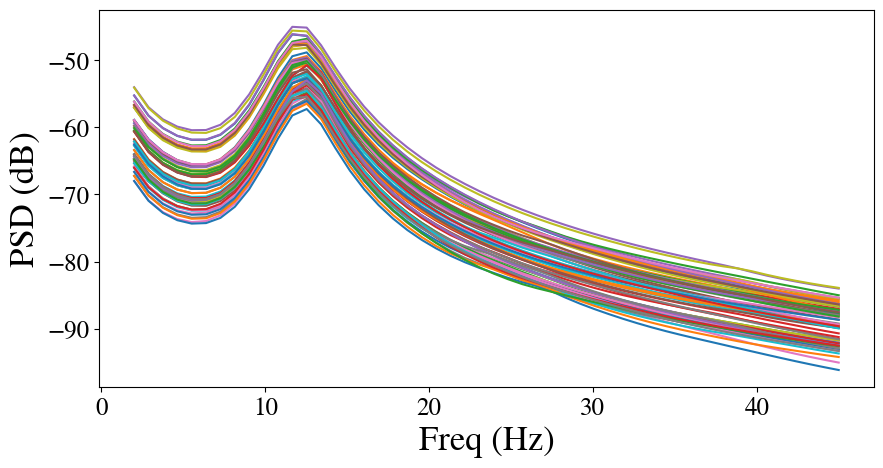

In [10]:
# forward SGM to get psd
psd = sgm.forward_psd(params);
psd_dB = 20 * np.log10(psd);
for roi_ix in range(psd_dB.shape[0]):
    plt.plot(sgm.freqs, psd_dB[roi_ix])
plt.xlabel("Freq (Hz)")
plt.ylabel("PSD (dB)")

<AxesSubplot:title={'center':'Modelled PSD'}>

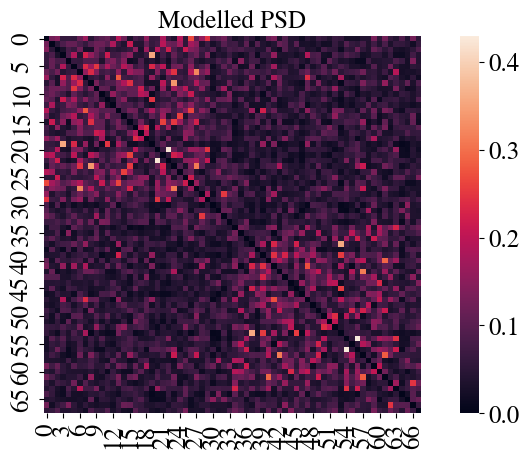

In [11]:
# forward SGM to get FC
fc = sgm.forward_fc(params);
plt.title("Modelled PSD")
sns.heatmap(fc, square=True)